### Importo librerías y ajusto algunas configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

### Cargo la Data

In [2]:
ruta_absoluta = 'C:/Users/Usuario/Desktop/Proyecto telecomunicaciones/Data limpia'
# Patrón de archivos CSV en la carpeta
patron = f'{ruta_absoluta}/*.csv'

# Buscar archivos que coinciden con el patrón
archivos_csv = glob.glob(patron)
dataframes = {}  # Diccionario para almacenar los DataFrames


In [3]:
for archivo in archivos_csv:
        # Obtener el nombre del archivo sin la ruta ni la extensión
        nombre_archivo = os.path.basename(archivo).split('.')[0]
        # Leer el archivo CSV y convertirlo en DataFrame
        df = pd.read_csv(archivo)
        # Asignar el DataFrame al nombre del archivo en el diccionario
        dataframes[nombre_archivo] = df

    # Asignar los DataFrames a variables separadas de forma automática
for nombre_archivo, df in dataframes.items():
        # Asignar el DataFrame a una variable con el nombre correspondiente
    globals()[nombre_archivo] = df


### La reviso y trabajo en ella

In [16]:
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.head(4)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985.0,27709.0,290315.0,297915.0,267044.0,12419.0,3618689.0,65821.0,4721668.0
1,2022,3,Capital Federal,5170.0,5742.0,34371.0,67829.0,51946.0,28692.0,1253105.0,105477.0,1547679.0
2,2022,3,Catamarca,710.0,3840.0,3107.0,5389.0,5099.0,3737.0,50298.0,2208.0,70293.0
3,2022,3,Chaco,4610.0,9870.0,16782.0,18938.0,8049.0,15828.0,79390.0,3711.0,144146.0


Me fijo si coincide el total en un trimestre puntual a modo de ejemplo de los datasets distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad y acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia

In [27]:
print(acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[(acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia['Año'] == 2022) & (acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia['Trimestre'] == 3)]['Total'].sum())
print(distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[(distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad['Año'] == 2022) & (distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad['Trimestre'] == 3)]['Total'])

11091128.0
0    11091128
Name: Total, dtype: int64


Son iguales, dato que me sirve para saber que hay coherencia entre los distintos datasets

In [26]:
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[(distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad['Año'] == 2022) & (distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad['Trimestre'] == 3)]['Total']

0    11091128
Name: Total, dtype: int64

Algunos retoques en conectividad_al_servicio_de_internet

In [6]:
conectividad_al_servicio_de_internet.head(2)

,Provincia,Partido,Localidad,Población,ADSL,CABLEMODEM,DIALUP,Fibra Óptica,Satelital,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud
0,NaN,Bahía Blanca,Villa Bordeau,0.0,False,False,False,False,False,False,False,False,True,"-38,6472605094596",NaN
1,BUENOS AIRES,NaN,NaN,0.0,False,False,False,False,False,False,False,False,False,"-38,7765069529222","-62,1851833537179"


In [5]:
columnas = ['ADSL', 'CABLEMODEM', 'DIALUP', 'Fibra Óptica', 'Satelital', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']
for columna in columnas:
   conectividad_al_servicio_de_internet[columna] = conectividad_al_servicio_de_internet[columna].map({'SI': True,'--': False, '0': False})
   conectividad_al_servicio_de_internet[columna] = conectividad_al_servicio_de_internet[columna].astype('bool')

In [7]:
#conectividad_al_servicio_de_internet.to_csv('Data limpia/conectividad_al_servicio_de_internet.csv', index=False)

In [44]:
conectividad_al_servicio_de_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      2871 non-null   object 
 1   Partido        2866 non-null   object 
 2   Localidad      2884 non-null   object 
 3   Población      4312 non-null   float64
 4   ADSL           4312 non-null   bool   
 5   CABLEMODEM     4312 non-null   bool   
 6   DIALUP         4312 non-null   bool   
 7   Fibra Óptica   4312 non-null   bool   
 8   Satelital      4312 non-null   bool   
 9   WIRELESS       4312 non-null   bool   
 10  TELEFONIAFIJA  4312 non-null   bool   
 11  3G             4312 non-null   bool   
 12  4G             4312 non-null   bool   
 13  Latitud        2872 non-null   object 
 14  Longitud       2879 non-null   object 
dtypes: bool(9), float64(1), object(5)
memory usage: 240.1+ KB


Comienzo con algunos gráficos que me ayuden a decidir KPIs y a encontrar insights

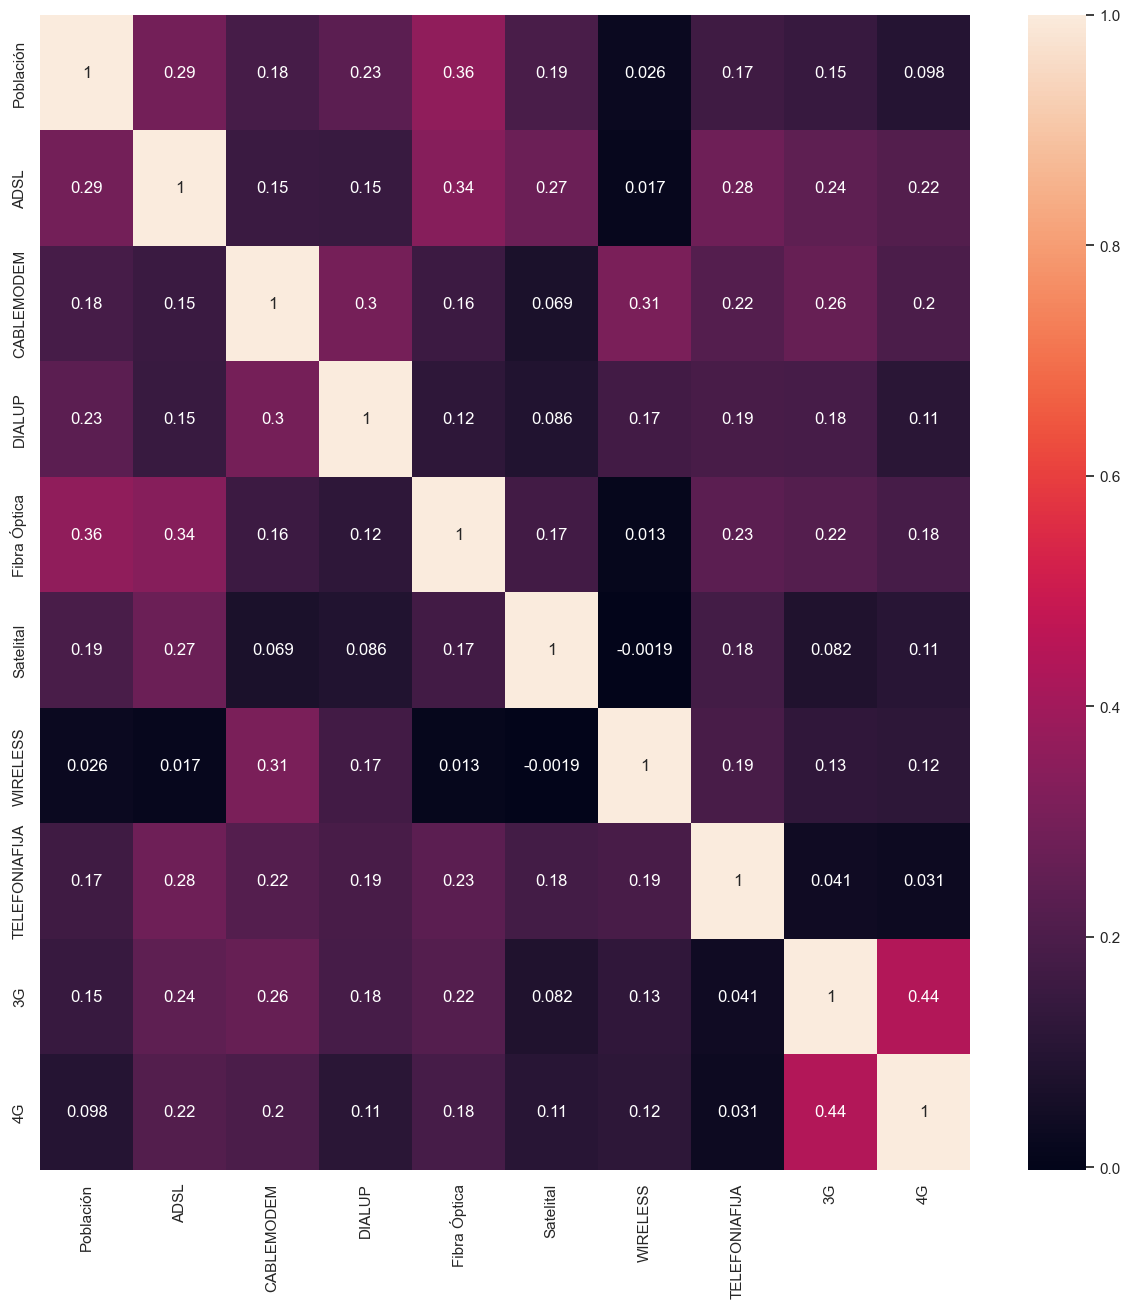

In [48]:
sns.heatmap(conectividad_al_servicio_de_internet[['Población', 'ADSL', 'CABLEMODEM', 'DIALUP', 'Fibra Óptica', 'Satelital', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']].corr(), annot=True)
sns.set(rc={'figure.figsize':(15,15)})

In [51]:
penetración_por_hogares_nacional_de_internet_fijo.head(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,3,76.64,23.95
1,2022,2,75.97,23.72


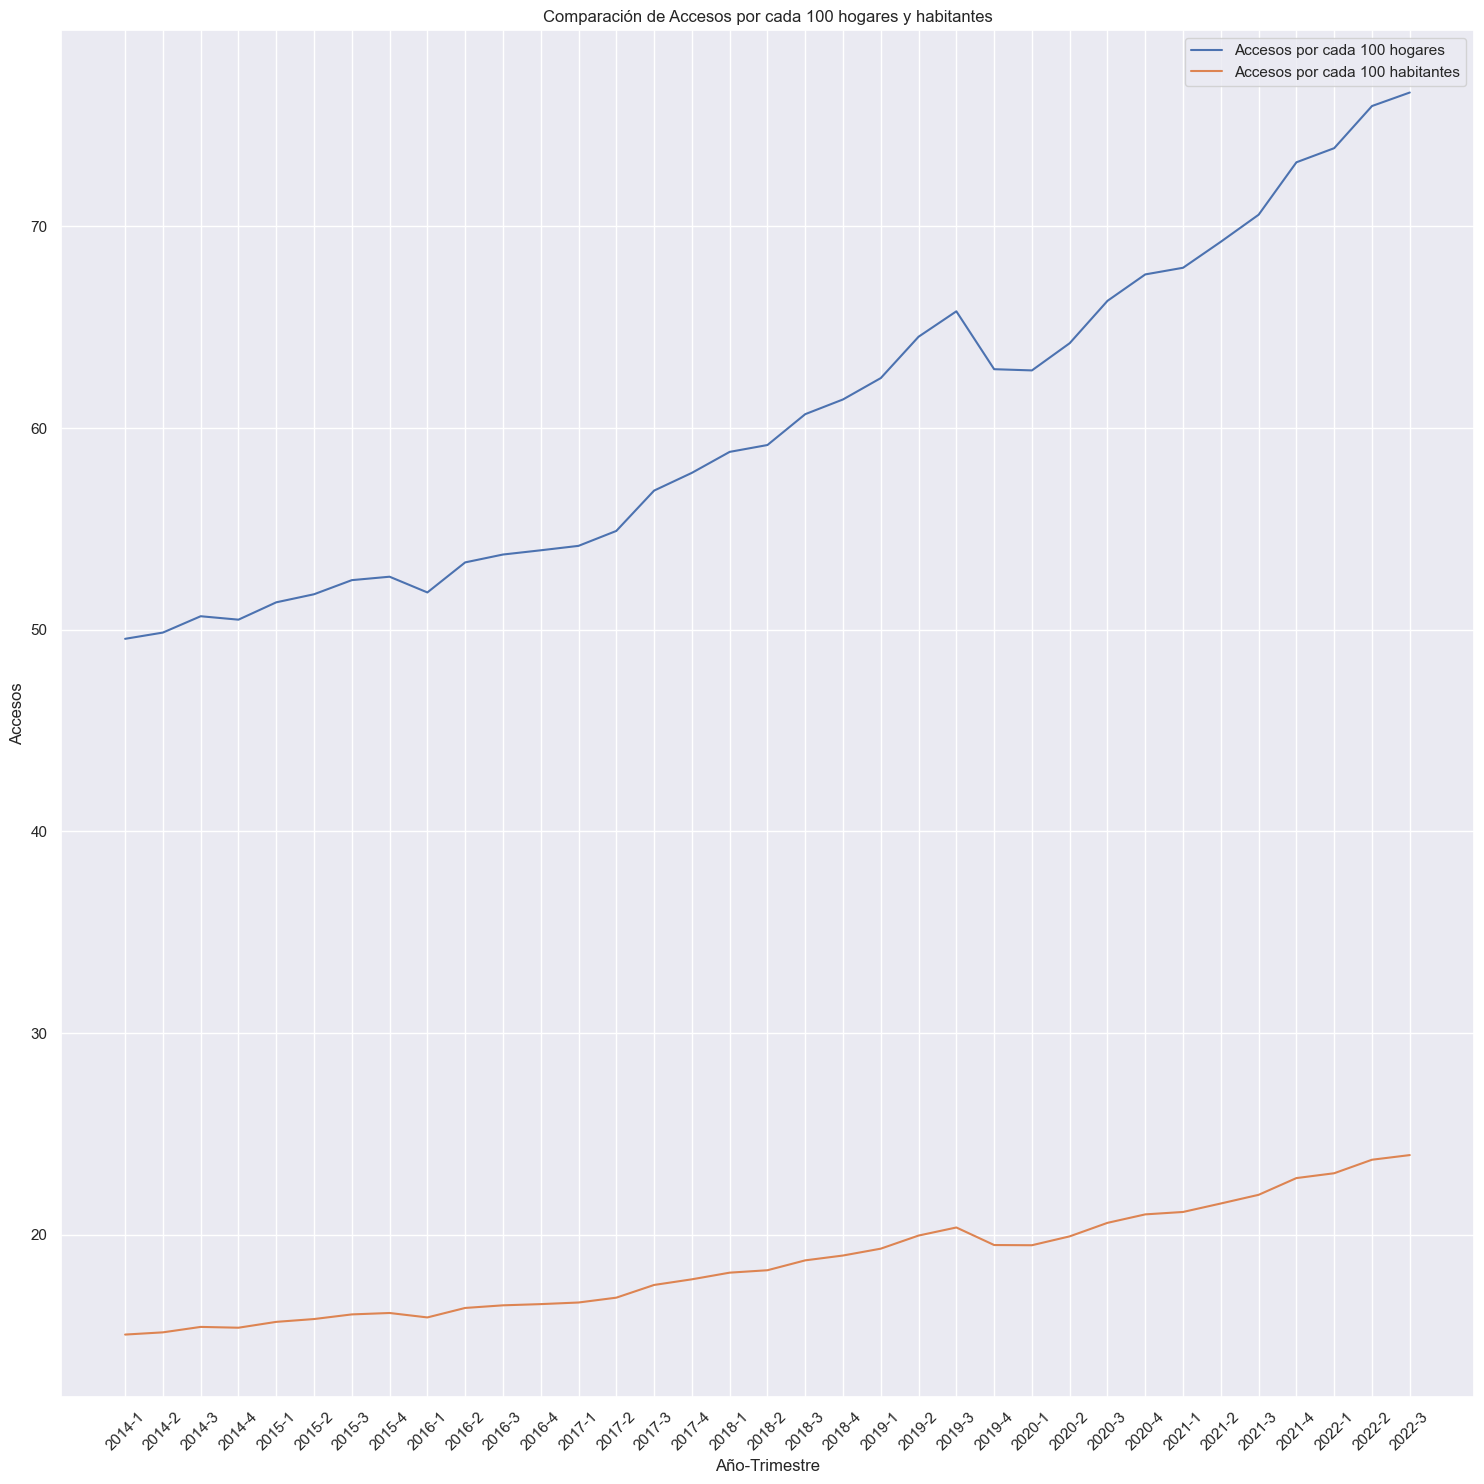

In [53]:
# Combinar las columnas 'Año' y 'Trimestre' en una columna 'Año-Trimestre'
penetración_por_hogares_nacional_de_internet_fijo['Año-Trimestre'] = penetración_por_hogares_nacional_de_internet_fijo['Año'].astype(str) + '-' + penetración_por_hogares_nacional_de_internet_fijo['Trimestre'].astype(str)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Trazar los valores de accesos por cada 100 hogares
ax.plot(penetración_por_hogares_nacional_de_internet_fijo['Año-Trimestre'], penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')

# Trazar los valores de accesos por cada 100 habitantes
ax.plot(penetración_por_hogares_nacional_de_internet_fijo['Año-Trimestre'], penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hab'], label='Accesos por cada 100 habitantes')

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Accesos')
ax.set_title('Comparación de Accesos por cada 100 hogares y habitantes')

# Mostrar la leyenda
ax.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Invertir el sentido del eje x
plt.gca().invert_xaxis()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Identificar outliers

In [61]:
# Calcular el rango intercuartil (IQR) para detectar outliers
Q1 = penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers en la columna 'Accesos por cada 100 hogares'
outliers = (penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares'] < limite_inferior) | (penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares'] > limite_superior)

# Filtrar los registros que contienen outliers
outliers_df = penetración_por_hogares_nacional_de_internet_fijo[outliers]

# Imprimir los registros que contienen outliers
outliers_df

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año-Trimestre


In [67]:
# Calcular el rango intercuartil (IQR) para detectar outliers
Q1 = penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hab'].quantile(0.25)
Q3 = penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hab'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers en la columna 'Accesos por cada 100 hab'
outliers = (penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hab'] < limite_inferior) | (penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hab'] > limite_superior)

# Filtrar los registros que contienen outliers
outliers_df = penetración_por_hogares_nacional_de_internet_fijo[outliers]

# Imprimir los registros que contienen outliers
outliers_df

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año-Trimestre


No encontré outliers en este caso. Continúo con los gráficos.

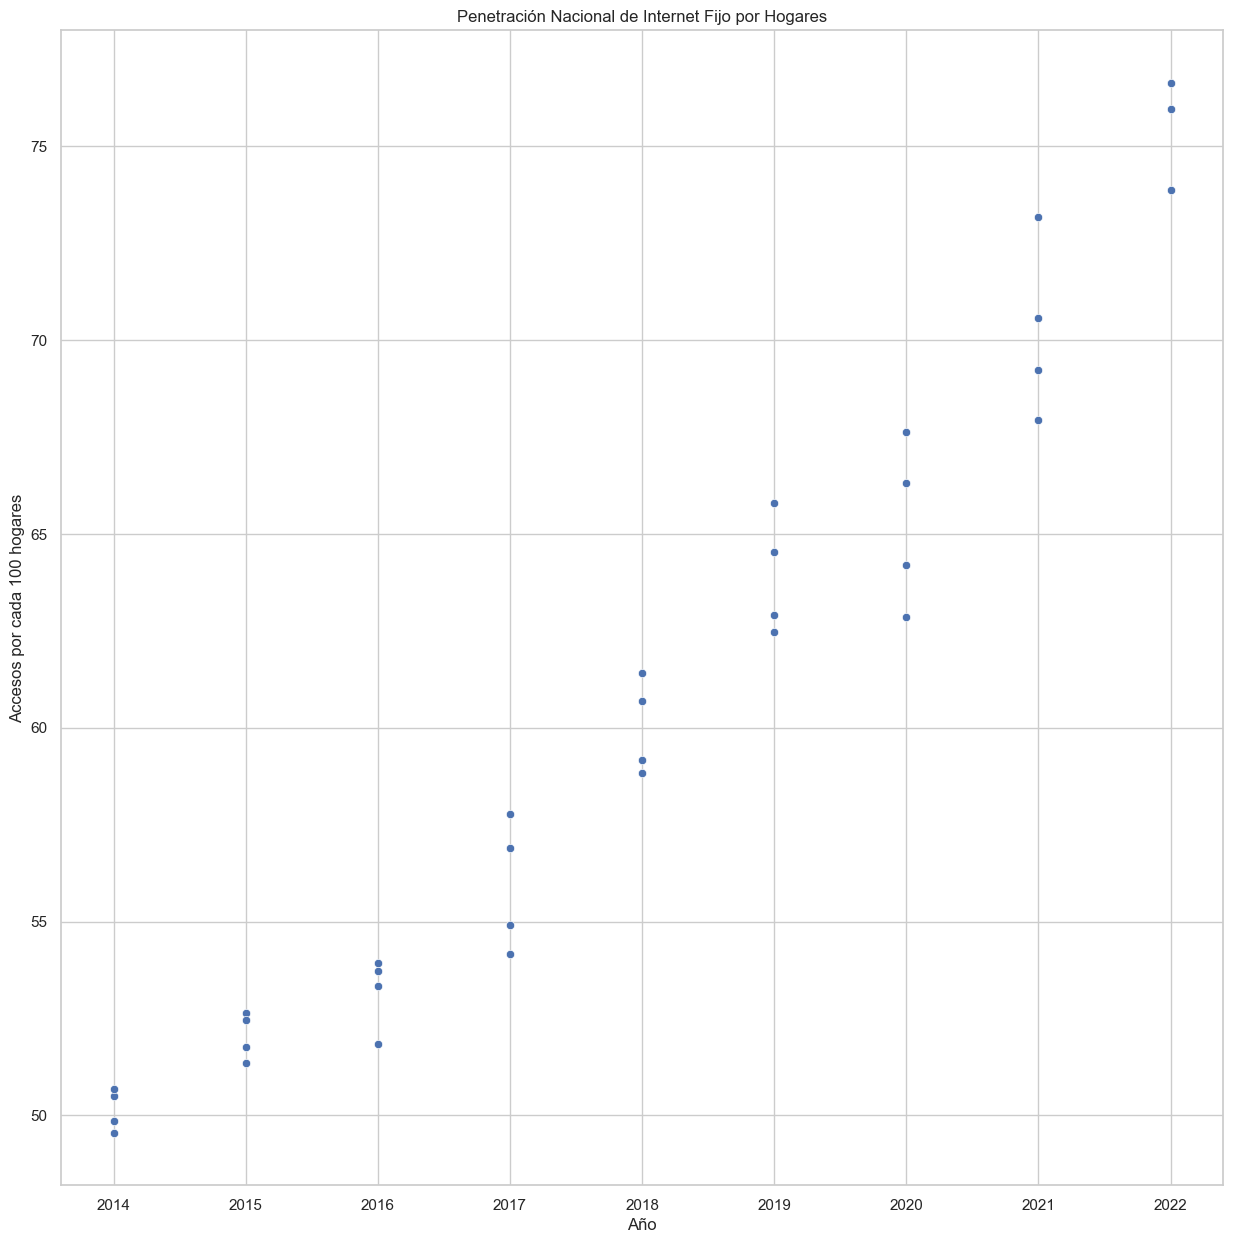

In [211]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Datos de x e y
x = penetración_por_hogares_nacional_de_internet_fijo['Año']
y = penetración_por_hogares_nacional_de_internet_fijo['Accesos por cada 100 hogares']

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar utilizando un scatter plot
sns.scatterplot(x=x, y=y, ax=ax)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Penetración Nacional de Internet Fijo por Hogares')

# Mostrar el gráfico
plt.show()


In [78]:
penetración_por_hogares_nacional_de_internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


In [12]:
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.head(20)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Año-Trimestre,Proporcion_Fibra
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,2022-3,0.258904
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,2022-2,0.248505
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,2022-1,0.208917
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,2021-4,0.197548
4,2021,3,1950631,5826257,1566048,492415,25019,10085541,2021-3,0.155277
5,2021,2,2018587,5641731,1472246,476968,253552,9863084,2021-2,0.149268
6,2021,1,2175211,5424782,1362976,434548,250455,9647972,2021-1,0.141271
7,2020,4,2213949,5371824,1311199,421554,253036,9571562,2020-4,0.136989
8,2020,3,2263889,5259351,1170879,413259,248821,9356199,2020-3,0.125145
9,2020,2,2295533,5005115,1106725,376667,247016,9031056,2020-2,0.122547


Analizar la evolución temporal de la proporción de Fibra óptica respecto del total de accesos.

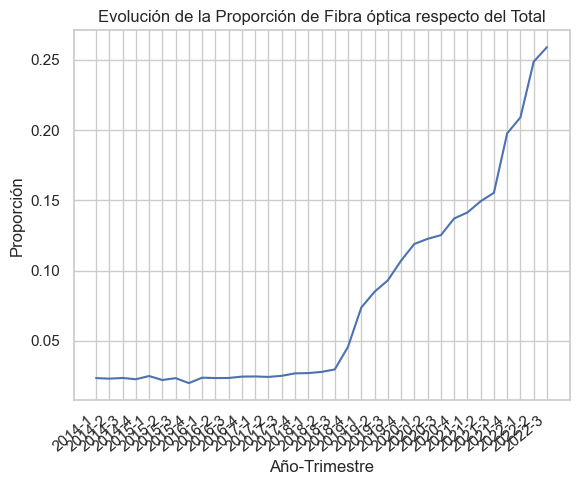

In [9]:
# Combinar las columnas "Año" y "Trimestre" en una columna "Año-Trimestre"
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Año-Trimestre'] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Año'].astype(str) + '-' + serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Trimestre'].astype(str)

# Calcular la proporción de Fibra óptica respecto al Total
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Proporcion_Fibra'] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Fibra óptica'] / serie_trimestral_de_accesos_a_internet_fijo_por_tecnología['Total']

# Establecer el estilo de Seaborn
sns.set(style='whitegrid')

# Crear una figura y ejes
fig, ax = plt.subplots()

# Trazar la proporción de Fibra óptica respecto del Total
sns.lineplot(data=serie_trimestral_de_accesos_a_internet_fijo_por_tecnología, x='Año-Trimestre', y='Proporcion_Fibra', ax=ax)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Proporción')
ax.set_title('Evolución de la Proporción de Fibra óptica respecto del Total')

# Invertir el sentido del eje x
plt.gca().invert_xaxis()

# Rotar las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')

# Mostrar el gráfico
plt.show()


In [11]:
#serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.to_csv('Data limpia/serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.csv', index=False)

In [130]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.head(2)

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,3,67055930
1,2022,2,60335724


Creo un df con los valores mensuales del dolar.
Fuente: http://estudiodelamo.com/cotizacion-historica-dolar-peso-argentina/

In [131]:
# Valores históricos del dólar por mes y año
dolar_valores = [
    ('2014', 'Enero', 7.87),
    ('2014', 'Febrero', 7.80),
    ('2014', 'Marzo', 7.93),
    ('2014', 'Abril', 7.93),
    ('2014', 'Mayo', 8.01),
    ('2014', 'Junio', 8.06),
    ('2014', 'Julio', 8.12),
    ('2014', 'Agosto', 8.30),
    ('2014', 'Septiembre', 8.31),
    ('2014', 'Octubre', 8.40),
    ('2014', 'Noviembre', 8.43),
    ('2014', 'Diciembre', 8.46),
    ('2015', 'Enero', 8.55),
    ('2015', 'Febrero', 8.63),
    ('2015', 'Marzo', 8.72),
    ('2015', 'Abril', 8.81),
    ('2015', 'Mayo', 8.90),
    ('2015', 'Junio', 8.99),
    ('2015', 'Julio', 9.10),
    ('2015', 'Agosto', 9.20),
    ('2015', 'Septiembre', 9.33),
    ('2015', 'Octubre', 9.46),
    ('2015', 'Noviembre', 9.60),
    ('2015', 'Diciembre', 12.90),
    ('2016', 'Enero', 13.58),
    ('2016', 'Febrero', 15.50),
    ('2016', 'Marzo', 14.40),
    ('2016', 'Abril', 14.10),
    ('2016', 'Mayo', 13.80),
    ('2016', 'Junio', 14.80),
    ('2016', 'Julio', 14.80),
    ('2016', 'Agosto', 14.70),
    ('2016', 'Septiembre', 15.10),
    ('2016', 'Octubre', 15.00),
    ('2016', 'Noviembre', 15.70),
    ('2016', 'Diciembre', 15.70),
    ('2017', 'Enero', 15.70),
    ('2017', 'Febrero', 15.30),
    ('2017', 'Marzo', 15.20),
    ('2017', 'Abril', 15.20),
    ('2017', 'Mayo', 15.90),
    ('2017', 'Junio', 16.40),
    ('2017', 'Julio', 17.45),
    ('2017', 'Agosto', 17.10),
    ('2017', 'Septiembre', 17.10),
    ('2017', 'Octubre', 17.45),
    ('2017', 'Noviembre', 17.10),
    ('2017', 'Diciembre', 18.40),
    ('2018', 'Enero', 19.40),
    ('2018', 'Febrero', 19.85),
    ('2018', 'Marzo', 19.90),
    ('2018', 'Abril', 20.30),
    ('2018', 'Mayo', 24.40),
    ('2018', 'Junio', 28.40),
    ('2018', 'Julio', 26.90),
    ('2018', 'Agosto', 36.20),
    ('2018', 'Septiembre', 40.30),
    ('2018', 'Octubre', 35.00),
    ('2018', 'Noviembre', 36.80),
    ('2018', 'Diciembre', 36.80),
    ('2019', 'Enero', 36.40),
    ('2019', 'Febrero', 38.30),
    ('2019', 'Marzo', 42.30),
    ('2019', 'Abril', 43.20),
    ('2019', 'Mayo', 43.80),
    ('2019', 'Junio', 41.50),
    ('2019', 'Julio', 42.90),
    ('2019', 'Agosto', 57.00),
    ('2019', 'Septiembre', 55.50),
    ('2019', 'Octubre', 58.22),
    ('2019', 'Noviembre', 57.75),
    ('2019', 'Diciembre', 58.00),
    ('2020', 'Enero', 58.00),
    ('2020', 'Febrero', 59.00),
    ('2020', 'Marzo', 60.75),
    ('2020', 'Abril', 63.75),
    ('2020', 'Mayo', 65.50),
    ('2020', 'Junio', 68.50),
    ('2020', 'Julio', 71.25),
    ('2020', 'Agosto', 73.00),
    ('2020', 'Septiembre', 75.00),
    ('2020', 'Octubre', 77.50),
    ('2020', 'Noviembre', 80.50),
    ('2020', 'Diciembre', 83.25),
    ('2021', 'Enero', 86.25),
    ('2021', 'Febrero', 88.75),
    ('2021', 'Marzo', 91.50),
    ('2021', 'Abril', 92.50),
    ('2021', 'Mayo', 93.75),
    ('2021', 'Junio', 94.75),
    ('2021', 'Julio', 95.75),
    ('2021', 'Agosto', 96.75),
    ('2021', 'Septiembre', 98.00),
    ('2021', 'Octubre', 99.00),
    ('2021', 'Noviembre', 100.00),
    ('2021', 'Diciembre', 101.75),
    ('2022', 'Enero', 104.25),
    ('2022', 'Febrero', 106.50),
    ('2022', 'Marzo', 110.00),
    ('2022', 'Abril', 114.25),
    ('2022', 'Mayo', 119.25),
    ('2022', 'Junio', 124.00),
    ('2022', 'Julio', 129.25),
    ('2022', 'Agosto', 137.00),
    ('2022', 'Septiembre', 145.25)
]

# Crear el DataFrame 'valor_histórico_dolar'
valor_histórico_dolar = pd.DataFrame(dolar_valores, columns=['Año', 'Mes', 'valor'])

In [132]:
trimestres = {
    'Enero': 1,
    'Febrero': 1,
    'Marzo': 1,
    'Abril': 2,
    'Mayo': 2,
    'Junio': 2,
    'Julio': 3,
    'Agosto': 3,
    'Septiembre': 3,
    'Octubre': 4,
    'Noviembre': 4,
    'Diciembre': 4
}

# Agregar la columna 'Trimestre' al dataframe
valor_histórico_dolar['Trimestre'] = valor_histórico_dolar['Mes'].map(trimestres)


In [133]:
# Calcular el valor promedio del dólar por trimestre y año
promedio_dolar_trimestre = valor_histórico_dolar.groupby(['Año', 'Trimestre'])['valor'].mean()

In [134]:
# Resetear el índice para convertir el resultado en un dataframe
promedio_dolar_trimestre = promedio_dolar_trimestre.reset_index()

# Renombrar la columna del valor promedio del dólar
promedio_dolar_trimestre = promedio_dolar_trimestre.rename(columns={'valor': 'promedio_dolar_trimestre'})

# Fusionar el dataframe original con el valor promedio del dólar por trimestre y año
valor_histórico_dolar = valor_histórico_dolar.merge(promedio_dolar_trimestre, on=['Año', 'Trimestre'])

# Mostrar el dataframe actualizado
valor_histórico_dolar.head()

,Año,Mes,valor,Trimestre,promedio_dolar_trimestre
0,2014,Enero,7.87,1,7.866667
1,2014,Febrero,7.80,1,7.866667
2,2014,Marzo,7.93,1,7.866667
3,2014,Abril,7.93,2,8.000000
4,2014,Mayo,8.01,2,8.000000


In [163]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo[['Año', 'Trimestre']] = ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo[['Año', 'Trimestre']].astype(int)

In [166]:
valor_histórico_dolar[['Año','Trimestre']] = valor_histórico_dolar[['Año','Trimestre']].astype(int)

In [175]:
valor_histórico_dolar.drop(['Mes', 'valor'], inplace=True, axis=1)

In [177]:
valor_histórico_dolar.drop_duplicates(inplace=True)

Merge entre el nuevo dataframe y el de ingresos que ya tenía

In [180]:
merge_ingresos_valor_dolar = pd.merge(ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo,valor_histórico_dolar, on=['Año', 'Trimestre'], how='inner')
merge_ingresos_valor_dolar.head()


,Año,Trimestre,Ingresos (miles de pesos),promedio_dolar_trimestre
0,2022,3,67055930,137.166667
1,2022,2,60335724,119.166667
2,2022,1,55589997,106.916667
3,2021,4,45467887,100.250000
4,2021,3,42999944,96.833333


In [181]:
merge_ingresos_valor_dolar.rename({'valor': 'valor_dolar'}, inplace=True, axis=1)

In [182]:
merge_ingresos_valor_dolar['Ingresos (dólares)'] = merge_ingresos_valor_dolar['Ingresos (miles de pesos)'] / merge_ingresos_valor_dolar['promedio_dolar_trimestre']

In [212]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.head(2)

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,3,67055930
1,2022,2,60335724


In [215]:
merge_ingresos_valor_dolar.head(2)

,Año,Trimestre,Ingresos (miles de pesos),promedio_dolar_trimestre,Ingresos (miles de dólares),Año Trimestre
0,2022,3,67055930,137.166667,488864.617254,2022 T3
1,2022,2,60335724,119.166667,506313.767832,2022 T2


In [214]:
merge_ingresos_valor_dolar.rename({'Ingresos (dólares)': 'Ingresos (miles de dólares)'}, inplace=True, axis=1)

In [216]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo = merge_ingresos_valor_dolar

In [218]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.to_csv('Data limpia/ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.csv', index=False)

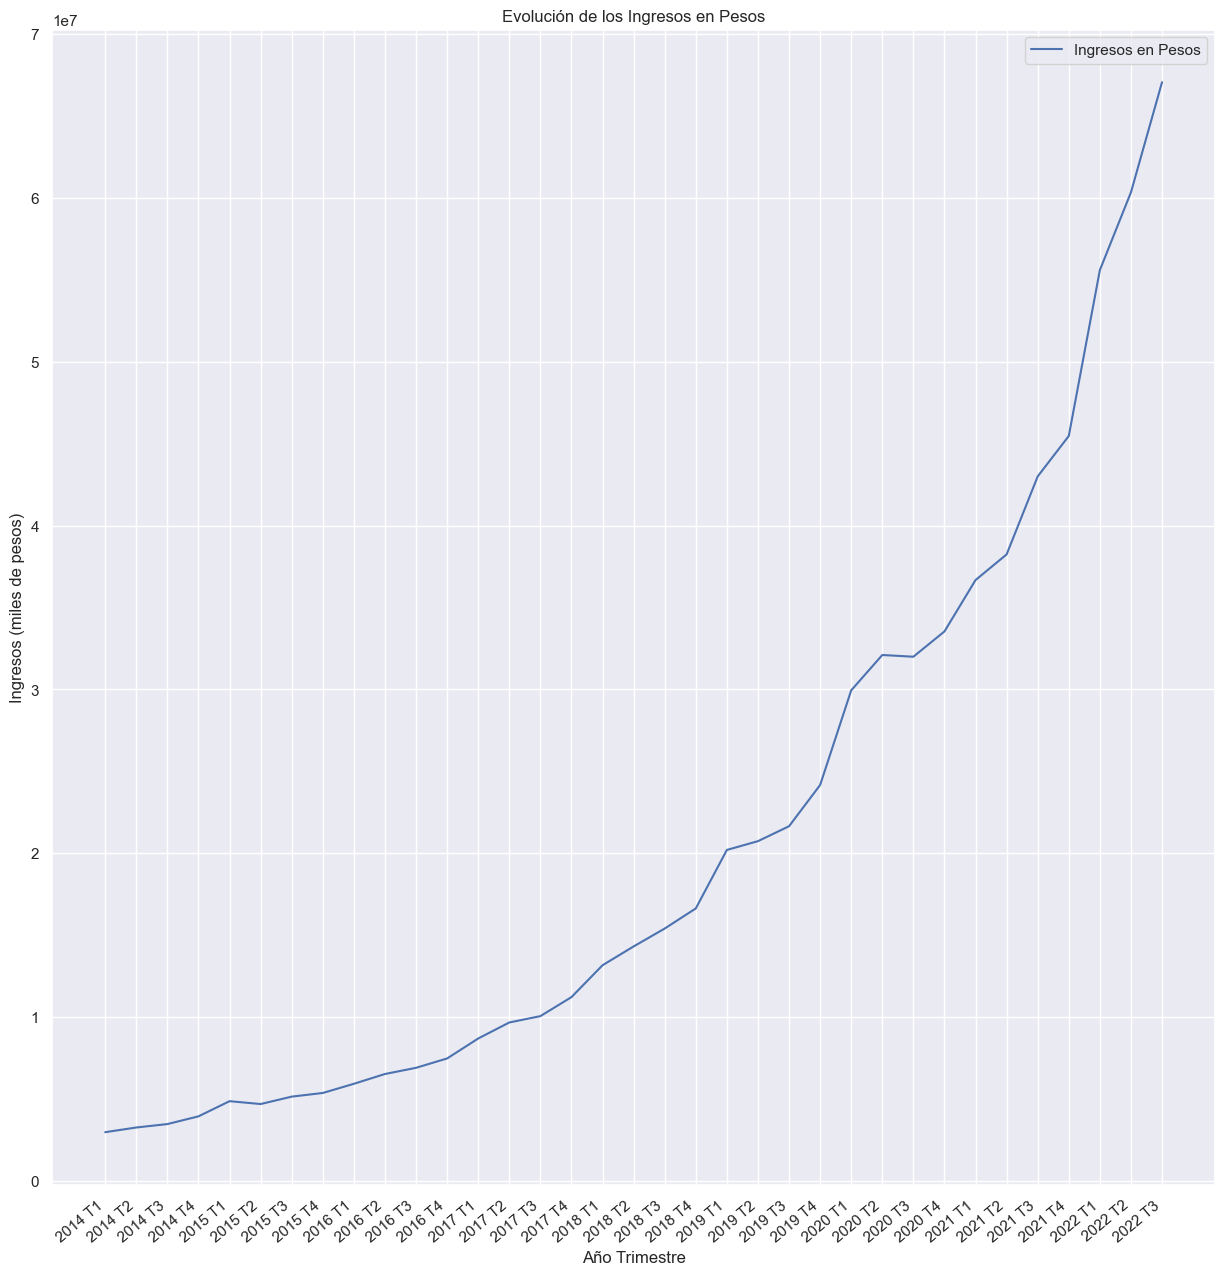

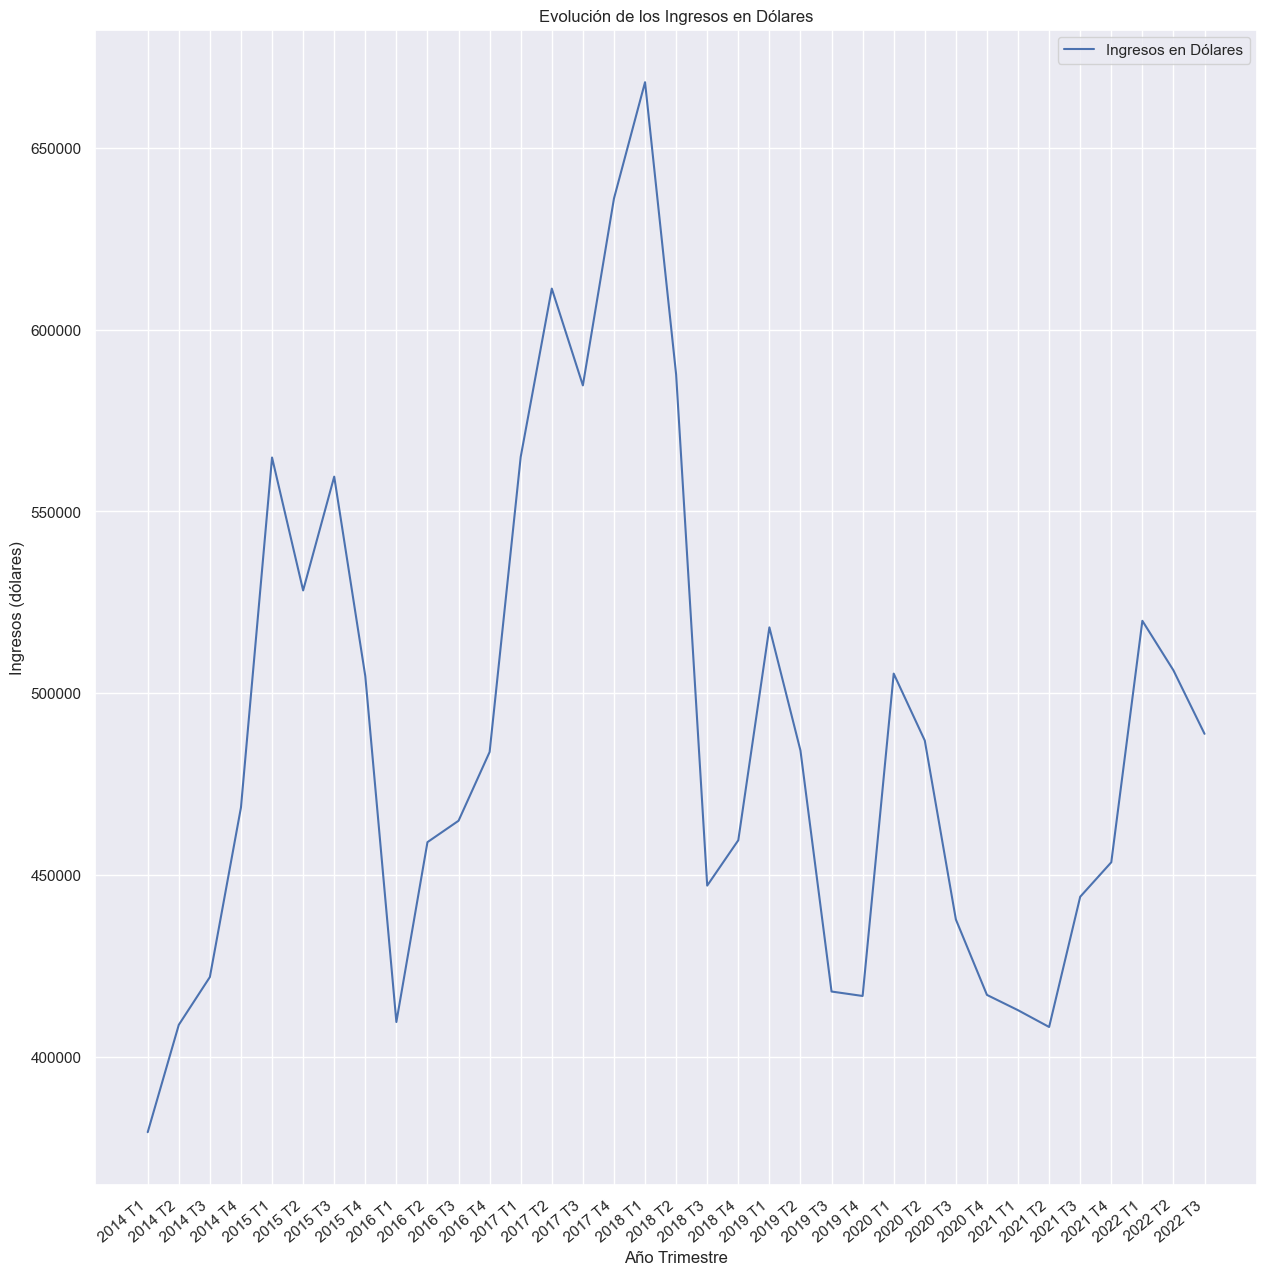

In [197]:
# Crear una figura y ejes para el gráfico de ingresos en pesos
fig, ax1 = plt.subplots()
sns.lineplot(data=merge_ingresos_valor_dolar, x='Año Trimestre', y='Ingresos (miles de pesos)', label='Ingresos en Pesos', ax=ax1)
ax1.set_xlabel('Año Trimestre')
ax1.set_ylabel('Ingresos (miles de pesos)')
ax1.set_title('Evolución de los Ingresos en Pesos')
ax1.legend()

# Crear una figura y ejes para el gráfico de ingresos en dólares
fig, ax2 = plt.subplots()
sns.lineplot(data=merge_ingresos_valor_dolar, x='Año Trimestre', y='Ingresos (dólares)', label='Ingresos en Dólares', ax=ax2)
ax2.set_xlabel('Año Trimestre')
ax2.set_ylabel('Ingresos (miles de dólares)')
ax2.set_title('Evolución de los Ingresos en Dólares')
ax2.legend()

# Invertir el sentido del eje x para ambos gráficos
ax1.invert_xaxis()
ax2.invert_xaxis()

# Ajustar las etiquetas del eje x para que sean legibles en ambos gráficos
plt.setp(ax1.get_xticklabels(), rotation=40, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=40, ha='right')

# Mostrar los gráficos
plt.show()

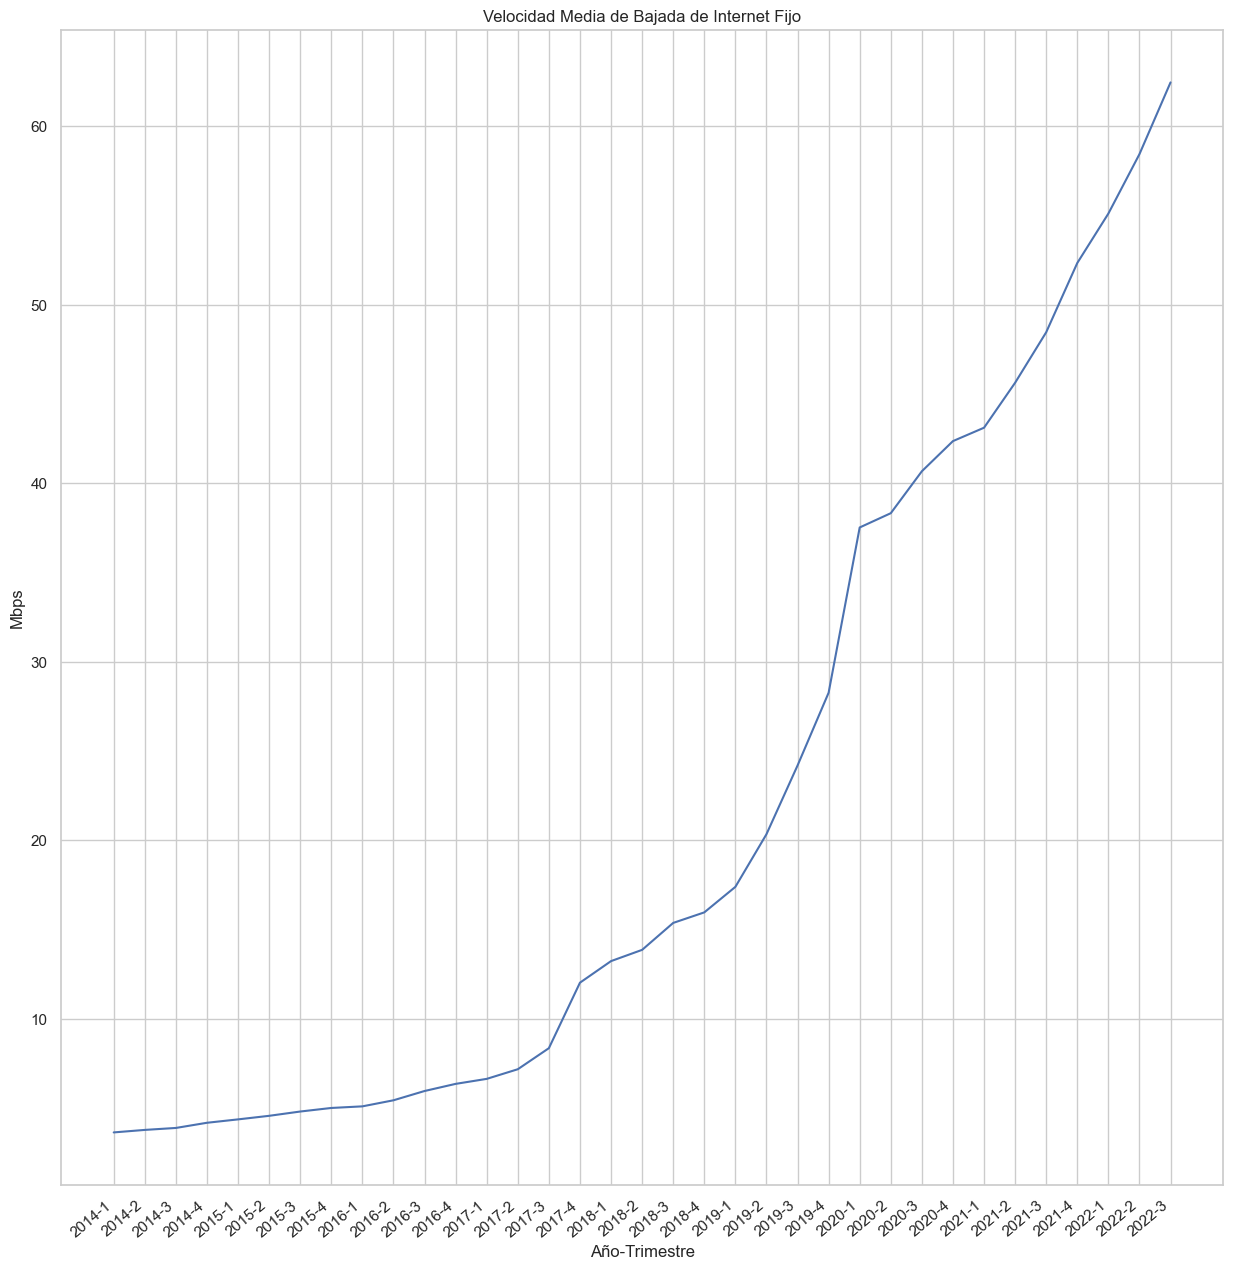

In [203]:
# Combinar las columnas "Año" y "Trimestre" en una columna "Año-Trimestre"
velocidad_media_de_bajada_de_internet_fijo['Año-Trimestre'] = velocidad_media_de_bajada_de_internet_fijo['Año'].astype(str) + '-' + velocidad_media_de_bajada_de_internet_fijo['Trimestre'].astype(str)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Trazar la velocidad media de bajada de internet fijo
sns.lineplot(data=velocidad_media_de_bajada_de_internet_fijo, x='Año-Trimestre', y='Mbps (Media de bajada)', ax=ax)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Mbps')
ax.set_title('Velocidad Media de Bajada de Internet Fijo')

# Invertir el sentido del eje x
plt.gca().invert_xaxis()

# Rotar las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')

# Mostrar el gráfico
plt.show()


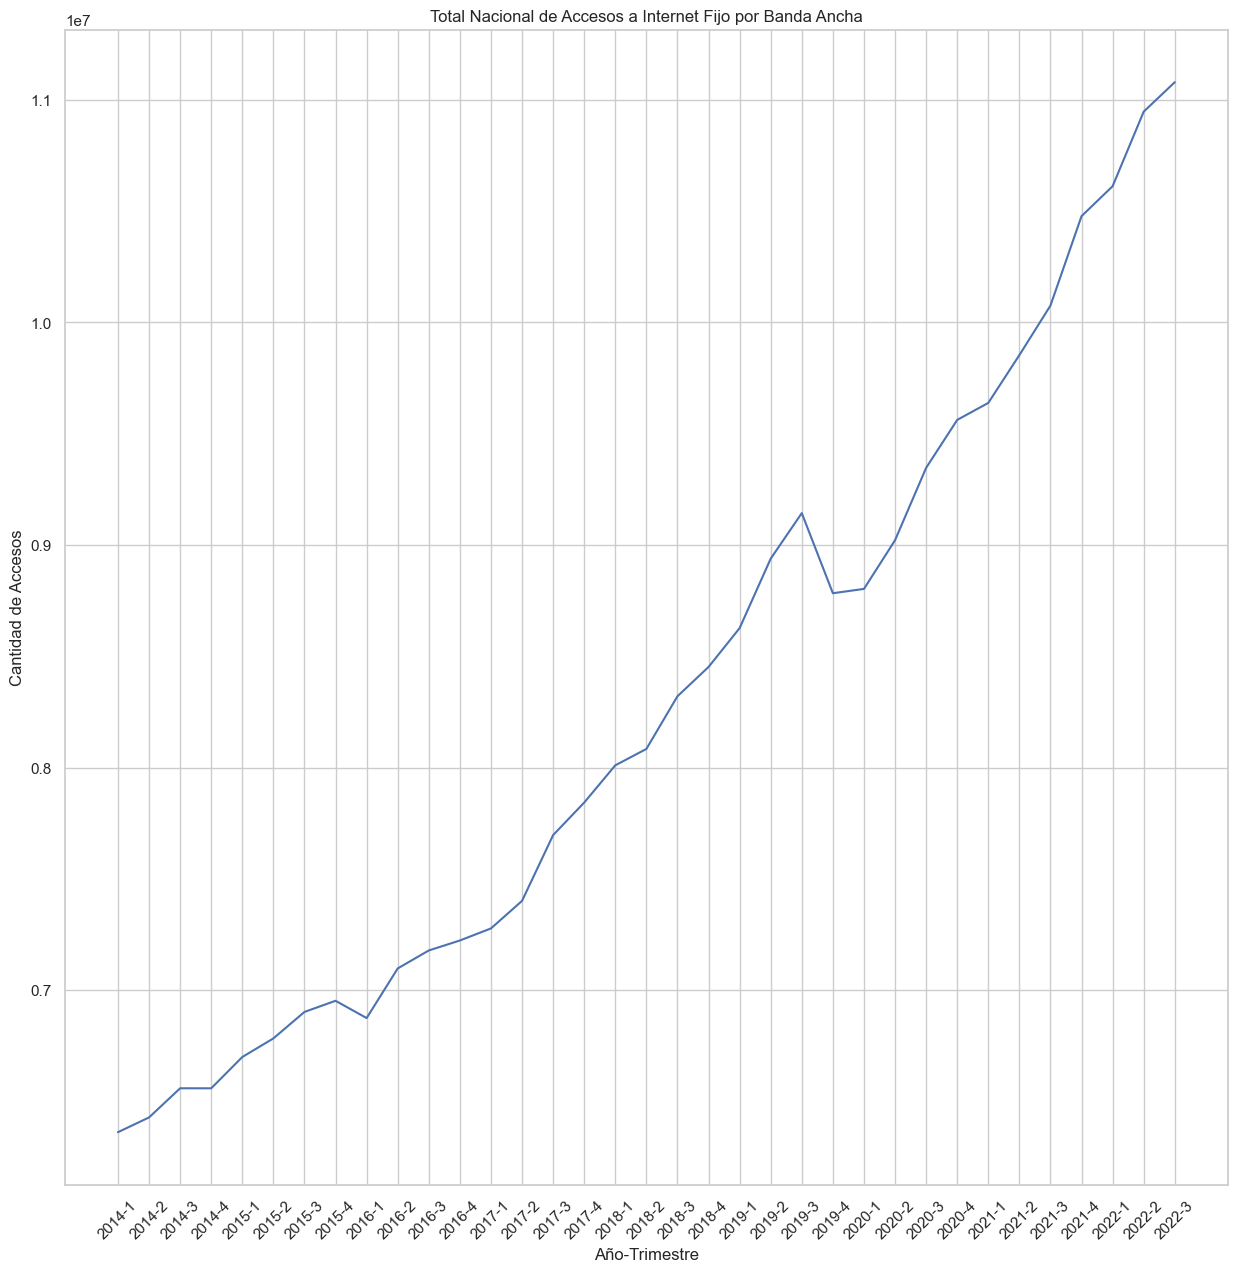

In [208]:
# Combinar las columnas "Año" y "Trimestre" en una columna "Año-Trimestre"
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Año-Trimestre'] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Año'].astype(str) + '-' + total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Trimestre'].astype(str)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Trazar la cantidad de accesos a internet fijo por banda ancha
sns.lineplot(data=total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral, x='Año-Trimestre', y='Banda ancha fija')

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Cantidad de Accesos')
ax.set_title('Total Nacional de Accesos a Internet Fijo por Banda Ancha')

# Invertir el sentido del eje x
plt.gca().invert_xaxis()

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

